# Data loading 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
import os
from IPython.display import Image
from matplotlib import style
style.use("ggplot")

os.getcwd() 
os.chdir('/Users/DHY/Dropbox/2018/WB/PredictorSelection')
df_source=pd.read_stata('Bhutan2015_recent.dta')

df=df_source[['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'region',
 'residence',
 'drinkingwater',
# 'water_time',
# 'wateronpremises',  
# 'drinkingwater',
 'toilet',
 'floor',
 'wall',
 'roof',
 'cooking_fuel',
# 'net',
 'washhands',
 'water_treat',
# 'cooking_location',
 'agri_ownership',
# 'bank',
 'wealth_index',
# 'house_ownership',
# 'insurance',
# 'bpl',
# 'age_father',
# 'weight_father',
# 'height_father',
# 'edu_father',
 'age_mother',
 'edu_mother',
# 'weight_mother',
# 'height_mother',
 'hemoglobin_mother',
# 'death_under5',
 'HAZ', 'stunt']]

# 'bank' 'house_ownership' 'insurance' 'bpl' 'age_father' 'weight_father'\n 'height_father' 'edu_father'

df_target=df_source[['HAZ', 'stunt' ,'svr_stunt','WHZ' ,'wast' ,'svr_wast' ,'WAZ' ,'underweight' ,'svr_underweight']]


In [14]:
# Check format of variables in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 24 columns):
birthorder           1506 non-null int16
age_child            1506 non-null int8
gender_child         1451 non-null float64
birthmonth           1504 non-null float64
interview_month      1506 non-null float32
hhsize_defacto       1506 non-null int8
under5               1506 non-null int8
region               1506 non-null object
residence            1506 non-null category
drinkingwater        1506 non-null category
toilet               1506 non-null category
floor                1506 non-null category
wall                 1506 non-null category
roof                 1506 non-null category
cooking_fuel         1506 non-null category
washhands            1506 non-null category
water_treat          1506 non-null category
agri_ownership       1506 non-null category
wealth_index         1506 non-null category
age_mother           1396 non-null float64
edu_mother           1394 non-null

In [15]:
df.isnull().sum()
df_clean=df.dropna(thresh=0.9*len(df), axis=1) # drop variables missing more than 10%
temp=pd.DataFrame(df_clean.isnull().sum()/len(df_clean)*100.00) # - Make DF slim 
temp.columns=['missing_Percent']
temp=temp[temp['missing_Percent']>0]
temp # shows list& % of variables that are missing less than 10% 


,missing_Percent
gender_child,3.652058
birthmonth,0.132802
age_mother,7.304117
edu_mother,7.436919
HAZ,4.448871
stunt,4.448871


In [16]:
df.stunt.describe()

count    1439.000000
mean        0.214732
std         0.410779
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stunt, dtype: float64

In [17]:
temp['colnam']=temp.index
temp
df_light=df_clean.dropna(subset = [temp.colnam]) # - make DF short 
df_light.isnull().sum() # Check all variables have no missing rows 


birthorder         0
age_child          0
gender_child       0
birthmonth         0
interview_month    0
hhsize_defacto     0
under5             0
region             0
residence          0
drinkingwater      0
toilet             0
floor              0
wall               0
roof               0
cooking_fuel       0
washhands          0
water_treat        0
agri_ownership     0
wealth_index       0
age_mother         0
edu_mother         0
HAZ                0
stunt              0
dtype: int64

In [18]:
# Sort variables by data format  - Check if all variabls are allocated as in correct format 
dfType=df.dtypes
dfType=pd.DataFrame(dfType.value_counts())
dfType=dfType.reset_index()
dfType.columns=["VarType","value"]
dfType['percent']=(dfType['value']/len(df.columns))*100
dfType['Variables']=""
vartypes=["float64","float32", "int64","int8","category"]
for vartype in vartypes:
    ObjectVarNam=df.columns[df.dtypes==vartype].tolist()
    strObjectVarNam=', '.join('"{0}"'.format(w) for w in ObjectVarNam)
    dfType.loc[(dfType['VarType']==vartype), "Variables"]= strObjectVarNam

dfType

,VarType,value,percent,Variables
0,category,12,50.000000,"""residence"", ""drinkingwater"", ""toilet"", ""floor..."
1,float64,5,20.833333,"""gender_child"", ""birthmonth"", ""age_mother"", ""h..."
2,int8,3,12.500000,"""age_child"", ""hhsize_defacto"", ""under5"""
3,float32,2,8.333333,"""interview_month"", ""HAZ"""
4,object,1,4.166667,
5,int16,1,4.166667,


In [19]:
(1-(len(df_light)*1.00/len(df_source)*1.00))*100.00 # Shows % of dropped rows compare to the original data 

14.276228419654712

In [20]:
colnum=df_light.shape
tot_colnum=df.shape
tot_colnum[1]-colnum[1] # Number of deleted columns due to complete(>90%) missing

1

In [21]:
df_light.columns.tolist()

['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'region',
 'residence',
 'drinkingwater',
 'toilet',
 'floor',
 'wall',
 'roof',
 'cooking_fuel',
 'washhands',
 'water_treat',
 'agri_ownership',
 'wealth_index',
 'age_mother',
 'edu_mother',
 'HAZ',
 'stunt']

## Data cleaning & Descriptive stats

In [24]:
# int 
df_light.stunt=df_light.stunt.astype(int)
#df_light.death_under5=df_light.death_under5.astype(int)
df_light.birthorder=df_light.birthorder.astype(int)
df_light.age_child=df_light.age_child.astype(int)
df_light.birthmonth=df_light.birthmonth.astype(int)
df_light.interview_month=df_light.interview_month.astype(int)
df_light.hhsize_defacto=df_light.hhsize_defacto.astype(int)
df_light.under5=df_light.under5.astype(int)
df_light.age_mother=df_light.age_mother.astype(int)

# cat 
df_light.region=df_light.region.astype('category')
df_light.residence=df_light.residence.astype('category')
df_light.drinkingwater=df_light.drinkingwater.astype('category')
#df_light.drinkingwater=df_light.drinkingwater.astype('category')
df_light.toilet=df_light.toilet.astype('category')
df_light.floor=df_light.floor.astype('category')
df_light.wall=df_light.wall.astype('category')
df_light.roof=df_light.roof.astype('category')
df_light.cooking_fuel=df_light.cooking_fuel.astype('category')
#df_light.net=df_light.net.astype('category')
#df_light.washhands=df_light.washhands.astype('category')
df_light.water_treat=df_light.water_treat.astype('category')
#df_light.cooking_location=df_light.cooking_location.astype('category')
df_light.agri_ownership=df_light.agri_ownership.astype('category')
#df_light.bank=df_light.bank.astype('category')
df_light.wealth_index=df_light.wealth_index.astype('category')
df_light.water_treat=df_light.water_treat.astype('category')
df_light.gender_child=df_light.gender_child.astype('category')
df_light.edu_mother=df_light.edu_mother.astype('category')



# float  
#df_light.weight_mother=df_light.weight_mother.astype('float')
#df_light.height_mother=df_light.height_mother.astype('float')
df_light.HAZ=df_light.HAZ.astype('float')


In [25]:
df_light.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 0 to 1505
Data columns (total 23 columns):
birthorder         1291 non-null int64
age_child          1291 non-null int64
gender_child       1291 non-null category
birthmonth         1291 non-null int64
interview_month    1291 non-null int64
hhsize_defacto     1291 non-null int64
under5             1291 non-null int64
region             1291 non-null category
residence          1291 non-null category
drinkingwater      1291 non-null category
toilet             1291 non-null category
floor              1291 non-null category
wall               1291 non-null category
roof               1291 non-null category
cooking_fuel       1291 non-null category
washhands          1291 non-null category
water_treat        1291 non-null category
agri_ownership     1291 non-null category
wealth_index       1291 non-null category
age_mother         1291 non-null int64
edu_mother         1291 non-null category
HAZ                1291 non-null

In [26]:
#Numeric variables 
temp=df_light.describe().transpose()
temp
#print len(temp)

,count,mean,std,min,25%,50%,75%,max
birthorder,1291.0,4.463207,77.876174,0.000000,1.000000,2.000000,3.000000,2800.000000
age_child,1291.0,28.243997,16.191206,0.000000,13.000000,27.000000,42.000000,60.000000
birthmonth,1291.0,6.302866,3.549493,1.000000,3.000000,6.000000,10.000000,12.000000
interview_month,1291.0,4.094500,0.481012,3.000000,4.000000,4.000000,4.000000,5.000000
hhsize_defacto,1291.0,5.777692,2.066191,2.000000,4.000000,5.000000,7.000000,17.000000
under5,1291.0,1.372579,0.578550,1.000000,1.000000,1.000000,2.000000,5.000000
age_mother,1291.0,29.323780,6.073750,17.000000,25.000000,29.000000,33.000000,49.000000
HAZ,1291.0,-0.857364,1.615619,-5.995378,-1.802571,-0.998533,-0.011907,5.967286
stunt,1291.0,0.214562,0.410677,0.000000,0.000000,0.000000,0.000000,1.000000


In [27]:
#Object variables
temp=df_light.describe(include=['category']).transpose()
temp['prop_top_value']=(temp['freq']/len(df_light))*100.00
temp.sort_values(by=['unique'])
#print len(temp)

,count,unique,top,freq,prop_top_value
gender_child,1291,2,0,669,51.8203
residence,1291,2,Rural,1023,79.2409
agri_ownership,1291,2,Yes,1018,78.8536
water_treat,1291,3,Yes,1056,81.7971
edu_mother,1291,3,No Education,741,57.3974
wealth_index,1291,5,lower (Q2),416,32.2231
floor,1291,6,Plank/Shingles,851,65.9179
wall,1291,6,Mud-bonded bricks/stones,616,47.7149
roof,1291,6,�Metal sheet,1212,93.8807
washhands,1291,6,elsewhere in yard,577,44.694


In [29]:
df_light.residence.value_counts()

Rural    1023
Urban     268
Name: residence, dtype: int64

In [30]:
# Shows categorical variable proportion in each level when it has more than 3 categories
temp_short=temp[temp['unique']>=3]
colnam=temp_short.index

levellists=colnam
for levellist in levellists : 
    print "----------------"
    print ((df_light[levellist].value_counts())/len(df_light))*100
    

----------------
lhuntshe           20.681642
punakha            19.054996
samdrupjongkhar    16.034082
chukha             15.879163
wangdue            10.534469
sarpang             9.759876
thimphu             8.055771
Name: region, dtype: float64
----------------
Piped into premises    85.592564
Neighbor's pipe         5.809450
Public tap              3.020914
Protected spring        2.633617
Unprotected spring      2.091402
Surface water           0.387297
Unprotected well        0.232378
Other sources           0.154919
Protected well          0.077459
Name: drinkingwater, dtype: float64
----------------
Flush to septic tank (without soak pit)    26.878389
Pit latrine without slab/open pit          21.456235
Flush to septic tank (with soak pit)       16.266460
Pit latrine with slab                      12.316034
Flush to piped sewer system                 9.140201
Flush to pit (latrine)                      8.210689
No facility/Bush/Field                      4.492641
Flush to somw

In [31]:
temp[temp['unique']<3]

,count,unique,top,freq,prop_top_value
gender_child,1291,2,0,669,51.8203
residence,1291,2,Rural,1023,79.2409
agri_ownership,1291,2,Yes,1018,78.8536


In [32]:
df_encode=df_light[colnam]
df_encode.head()
df_dummy = pd.get_dummies(df_encode, drop_first=False)

test1=temp_short.index
df_nodummy=df_light.drop(test1,axis=1)

df_final=pd.concat([df_nodummy, df_dummy], axis=1)
df_final.shape

(1291, 82)

In [33]:
test1

Index([u'region', u'drinkingwater', u'toilet', u'floor', u'wall', u'roof',
       u'cooking_fuel', u'washhands', u'water_treat', u'wealth_index',
       u'edu_mother'],
      dtype='object')

In [ ]:
# df_final : Clean & encoded dataset 
# df_encode : dataset by categorical variables with only +3 level 
# df_target : Set of target variables 
# df_source : Original dataset 
# df_light = byproduct 
del test1 

## Visuliazation 

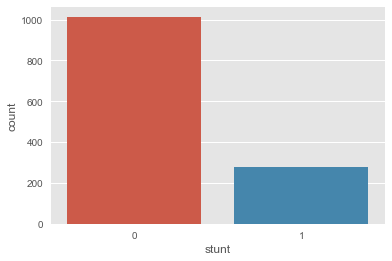

In [34]:
%matplotlib inline 
sns.countplot(x="stunt", data=df_light)

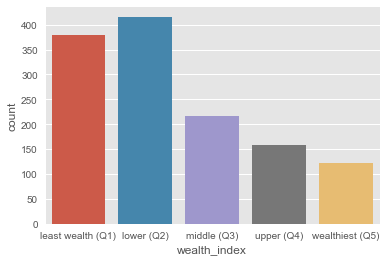

In [35]:
sns.countplot(x="wealth_index", data=df_light)

In [37]:
import seaborn as sns
sns.set(style="ticks")

#df_20perc=df_nodummy.sample(frac=0.2, replace=True)
#sns.pairplot(df_20perc, hue="stunt", kind="reg", plot_kws={'scatter_kws': {'alpha': 0.1}})

In [38]:
df_graph=pd.concat([df_final, df_encode], axis=1)

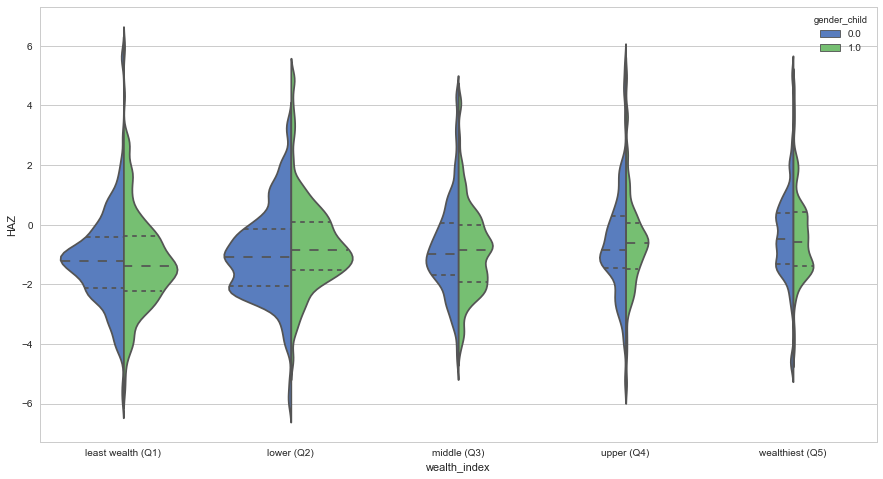

In [39]:
plt.figure(figsize=(15,8))
sns.set(style="whitegrid")
sns.violinplot(x='wealth_index', y='HAZ', hue='gender_child', split=True, palette="muted",data=df_graph , scale="count", inner="quartile",scale_hue=False, bw=.2)


## Data building for model

In [40]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

## Normalize numeric variables & concate with encoded dummy variables

In [41]:
df_nodummy.columns.tolist()

['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'residence',
 'agri_ownership',
 'age_mother',
 'HAZ',
 'stunt']

In [42]:
df_nodummy.head(5).transpose()

,0,1,2,3,4
birthorder,4,1,4,5,2
age_child,2,9,36,22,56
gender_child,1,0,0,0,0
birthmonth,2,7,4,6,8
interview_month,4,4,4,4,4
hhsize_defacto,6,4,4,4,4
under5,1,1,2,2,1
residence,Rural,Rural,Rural,Rural,Rural
agri_ownership,Yes,Yes,Yes,Yes,No
age_mother,41,22,42,42,28


In [43]:
pipeline = Pipeline([('imputer', Imputer(strategy = 'median')),('scaler', MinMaxScaler())])
X_temp=df_nodummy.drop(['gender_child',
                        'residence',
                        #'wateronpremises',
                        #'net', 
                        #'bank' ,
                        'agri_ownership',
                         'stunt','HAZ'], axis=1)


/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [44]:
X = pipeline.fit_transform(X_temp)
X=pd.DataFrame(X)
X.columns=X_temp.columns.tolist()

x_test=X.reset_index(drop=True)
df_dummy_test=df_dummy.reset_index(drop=True)
#df_orig=pd.concat([X, df_dummy], axis=1, join='inner')
df_orig=pd.concat([x_test, df_dummy_test], axis=1)

df_dummy_test.shape,x_test.shape, df_orig.shape

((1291, 70), (1291, 7), (1291, 77))

In [45]:
y=df_graph['stunt']
ytemp=pd.concat([df_graph, df_orig], axis=1, join='outer')
ytemp.columns.tolist()

['birthorder',
 'age_child',
 'gender_child',
 'birthmonth',
 'interview_month',
 'hhsize_defacto',
 'under5',
 'residence',
 'agri_ownership',
 'age_mother',
 'HAZ',
 'stunt',
 'region_chukha',
 'region_lhuntshe',
 'region_punakha',
 'region_samdrupjongkhar',
 'region_sarpang',
 'region_thimphu',
 'region_wangdue',
 'drinkingwater_Piped into premises',
 "drinkingwater_Neighbor's pipe",
 'drinkingwater_Public tap',
 'drinkingwater_Protected well',
 'drinkingwater_Protected spring',
 'drinkingwater_Unprotected well',
 'drinkingwater_Unprotected spring',
 'drinkingwater_Surface water',
 'drinkingwater_Other sources',
 'toilet_Flush to piped sewer system',
 'toilet_Flush to septic tank (without soak pit)',
 'toilet_Flush to septic tank (with soak pit)',
 'toilet_Flush to pit (latrine)',
 'toilet_Flush to somwhere else',
 'toilet_Vantilated Improved Pit',
 'toilet_Pit latrine with slab',
 'toilet_Pit latrine without slab/open pit',
 'toilet_Composting toilet',
 'toilet_Bucket',
 'toilet_No

In [46]:
df_orig.shape, df_graph.shape

((1291, 77), (1291, 93))

In [47]:
# Assign target as "stunt" and split for test/train 
y=df_graph['stunt']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_orig, y, test_size=0.20, random_state=110)
 

In [48]:
df_graph.stunt.value_counts()

0    1014
1     277
Name: stunt, dtype: int64

## Build models 

In [49]:
# LGB model 
import lightgbm as lgb

gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/anaconda2/lib/python2.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


UnicodeDecodeError: 'ascii' codec can't decode byte 0xa0 in position 5: ordinal not in range(128)

In [50]:
# XGB model 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.69%


In [51]:
# Tree model 
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Create adaboost-decision tree classifer object
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.24%


In [52]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(
    estimators=[#('LGB', gbm), 
                ('XGB', xgb),
                ('tree', clf)], 
                       voting='soft').fit(X_train,y_train)
#print('The accuracy for ensemble model:', ensemble.score(X_test,y_test))

In [53]:
y_pred = ensemble.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.69%


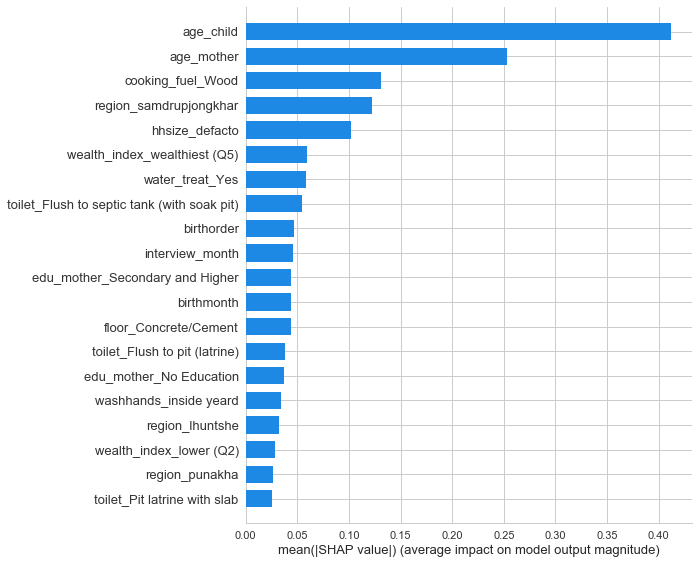

In [54]:
# visualization 
import shap
shap_values = shap.TreeExplainer(xgb).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

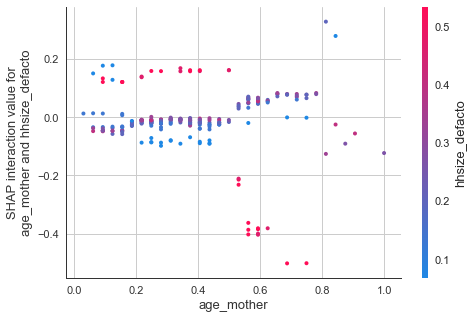

In [55]:
shap_interaction_values = shap.TreeExplainer(xgb).shap_interaction_values(X_test)


shap.dependence_plot(
    ("age_mother", "hhsize_defacto"),
    shap_interaction_values, X_test,
    display_features=X_test
)

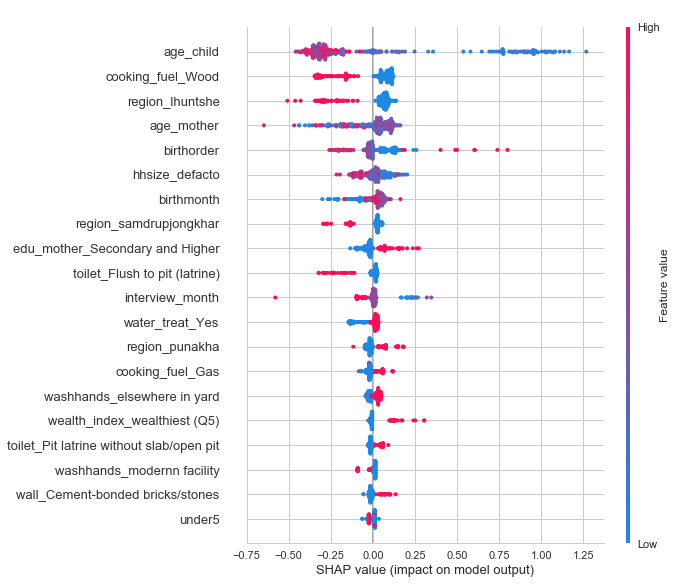

In [59]:
from xgboost import XGBRegressor

y=df_nodummy['HAZ']
X_train, X_test, y_train, y_test = train_test_split(df_orig, y, test_size=0.20, random_state=110)
xgb=XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
shap_values = shap.TreeExplainer(xgb).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

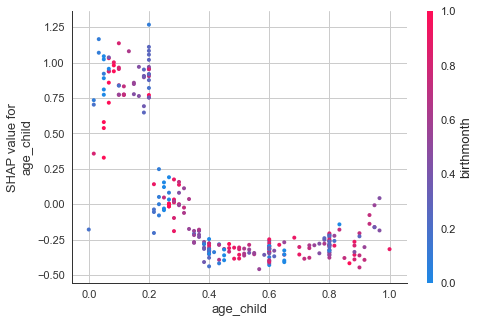

In [60]:
shap.dependence_plot("age_child", shap_values, X_test)

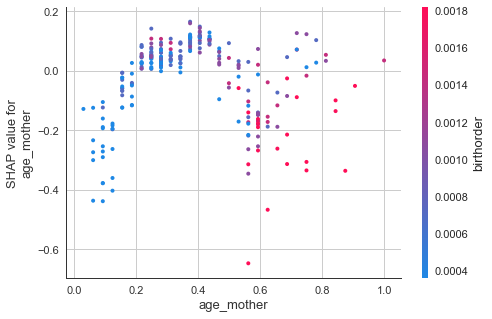

In [61]:
shap.dependence_plot("age_mother", shap_values, X_test)

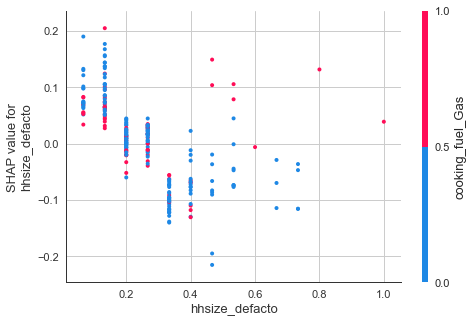

In [62]:
shap.dependence_plot("hhsize_defacto", shap_values, X_test)

## END - 